Kaggle Competition Voting 많이 받은 커널 따라해보기
[여기](https://www.kaggle.com/apapiu/regularized-linear-models)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import skew #척도
from scipy.stats.stats import pearsonr

In [4]:
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [5]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

## 전처리
 1. skew된 값을 로그로 취하여 정규분포 따라 나오게
 2. categorical 변수를 위한 dummy variables 만들고
 3. missing value를 mean 값으로 대체

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FAFE940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FBAFCC0>]], dtype=object)

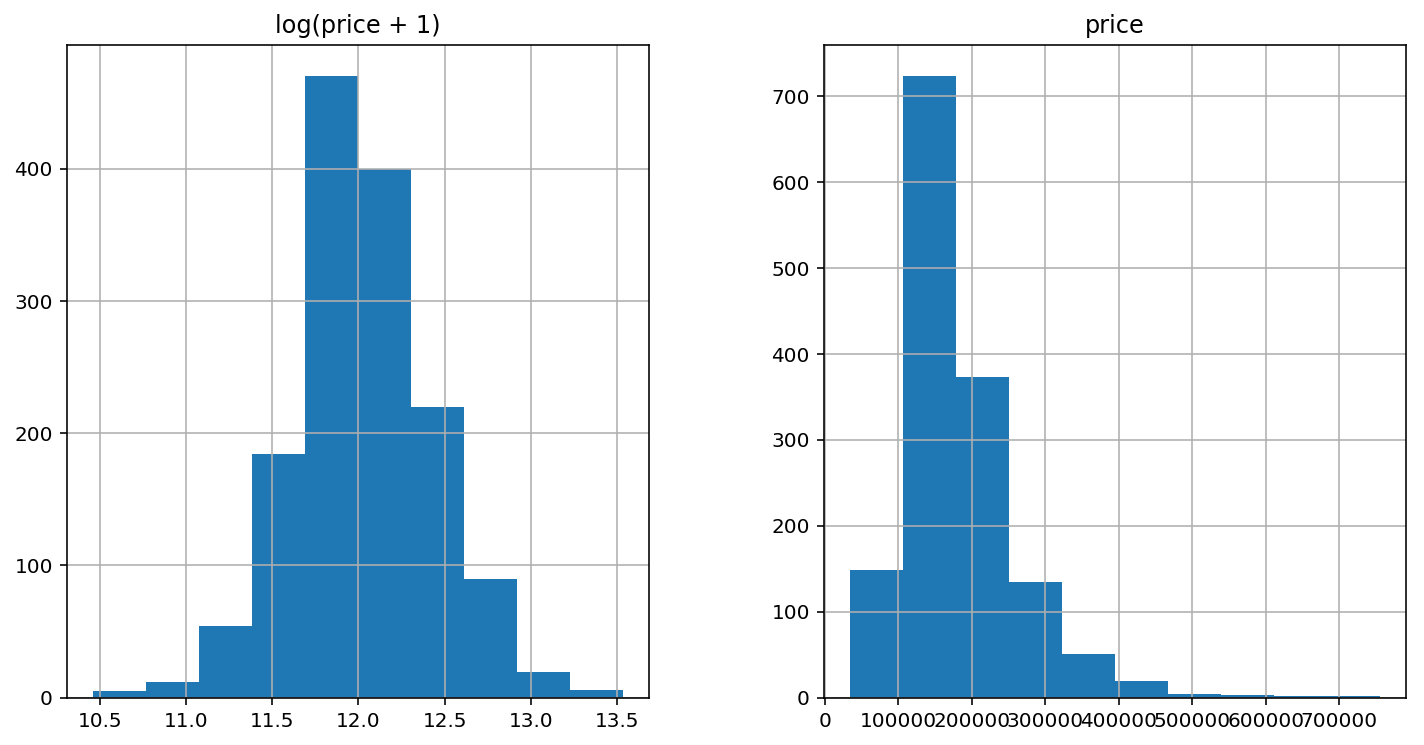

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [9]:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [10]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#위에서 보듯이 숫자형이 아닌건 다 object타입
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

In [11]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [12]:
help(skew)

Help on function skew in module scipy.stats.stats:

skew(a, axis=0, bias=True, nan_policy='propagate')
    Computes the skewness of a data set.
    
    For normally distributed data, the skewness should be about 0. A skewness
    value > 0 means that there is more weight in the left tail of the
    distribution. The function `skewtest` can be used to determine if the
    skewness value is close enough to 0, statistically speaking.
    
    Parameters
    ----------
    a : ndarray
        data
    axis : int or None, optional
        Axis along which skewness is calculated. Default is 0.
        If None, compute over the whole array `a`.
    bias : bool, optional
        If False, then the calculations are corrected for statistical bias.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propag

In [13]:
train["GarageCars"].dropna()

0       2
1       2
2       2
3       3
4       3
5       2
6       2
7       2
8       2
9       1
10      1
11      3
12      1
13      3
14      1
15      2
16      2
17      2
18      2
19      1
20      3
21      1
22      2
23      2
24      1
25      3
26      2
27      3
28      1
29      1
       ..
1430    2
1431    2
1432    1
1433    2
1434    2
1435    2
1436    2
1437    3
1438    2
1439    2
1440    2
1441    2
1442    3
1443    1
1444    2
1445    1
1446    1
1447    2
1448    1
1449    0
1450    0
1451    3
1452    2
1453    0
1454    2
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

In [14]:
#compute skewness
skewed_feats = train[numeric_feats].apply(lambda x : skew(x.dropna())) 

In [15]:
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64

In [16]:
skewed_feats = skewed_feats[skewed_feats > 0.75]

In [17]:
skewed_feats= skewed_feats.index

In [18]:
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [19]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternativly, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        If `columns` i

In [20]:
all_data = pd.get_dummies(all_data)

In [21]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,0.0,732.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369.0,0.0,...,0,0,0,1,0,0,0,0,1,0
7,60,NaN,10382,7,6,1973,1973,240.0,859.0,32.0,...,0,0,0,1,0,0,0,0,1,0
8,50,51.0,6120,7,5,1931,1950,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.0,7420,5,6,1939,1950,0.0,851.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# NA값을 mean 값으로~~!
all_data = all_data.fillna(all_data.mean())

In [23]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369.0,0.0,...,0,0,0,1,0,0,0,0,1,0
7,60,69.305795,10382,7,6,1973,1973,240.0,859.0,32.0,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
# creating matrices for sklearn?
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

In [25]:
y = train.SalePrice

## Models
sklearn을 써서 regularized linear regression 모델을 사용할 것이라고함. Lasso와 Ridge 정규화를 둘다 사용한다고 함. 또한 cross validatoin rsme 에러를 리턴하는 함수 정의하여 평가를 해서 best를 픽업

여기에서 Lasso와 Ridge에 대서 간단한 설명을 하고 넘어가자
![여기](https://brunch.co.kr/@itschloe1/11)글 참고


### Ridge Regresssion ( L2 regularization)
Linear Regression과는 차이는 추가항이 있다 Cost Function에서 MSE에다가 별도의 Penaltly term을 추가해서 alpha값이 커질수록 penaly가 커지면서 계수를 줄이는 효과가 있다고 함. 이는 변수를 축소하면서 다중 공선성을 방지한다고 함(multicollinearity)
여기서 alpha는 모델이 얼마나 유연한지를 측정하는 정규화 파라메터라고 생각하자. 알파값이 적으면 유연하되, overfitting이 될것이다. 하지만 반대로는 유연성을 잃을 것이고 데이터의 모든 신호를 잡아내지 못할 것이라고 함.

### Lasso Regression ( L1 regularziation)
위 글에 따르면 linear / ridge보다 더 높은 r-square값을 기록하나 미미
이것은 오히려 작은 coefficent는 죽여버리고 큰 coefficient는 올리는 효과(=feature selection)과 상당히 유사하며 ridge regression에는 없는 과정이라고 함

###  Ridge vs Lasso
변수가 1만개가 넘는 경우는 Ridge보다는 Lasso가 더 좋다고 함. Correlation이 있다면 한놈만 살리고 나머지는 0으로 바꾼다고 함. 정보가 손실됨에 따라 정확성이 떨어질 수 있다고. 그래서? 해결 방법은? 다른 유형의 Regression, Elastic Net Regression 같은게 있다고 함. Ridge와 Lasso의 하이브리드 형태라고 보면 된다고..  이녀석은 걍 이 글 보고 참고

In [26]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as 
 |      LogisticRegression or LinearSVC. If a

In [27]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model.coordinate_descent:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : boolean
 |      whether to calculate the intercept for this model. If set
 |     

In [28]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [29]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer 

In [30]:
model_ridge = Ridge()

In [31]:
help(np.sqrt)

Help on ufunc object:

sqrt = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array 

In [32]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer 

In [33]:
#위에서 얘기했던 rsme_cv를 만드네 여기서 cv는 cross validation임
def rmse_cv(model):
    rmse= np.sqrt( -cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [34]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369.0,0.0,...,0,0,0,1,0,0,0,0,1,0
7,60,69.305795,10382,7,6,1973,1973,240.0,859.0,32.0,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [36]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas ]

In [37]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.strings.StringAccessorMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be hashable and have the same length

여기에서 MixIn이라는것을 한번 살펴보면 [여기](http://encyclopedia.thefreedictionary.com/mixin) 기준으로 썰을 풀겠다.

이것은 객체지향 프로그래밍에서 다른 클래스들을 위한 메서드를 가지는 클래스이며 다른 클래스를 부모 클래스로 상속받지 않고 단독으로 행동하는 녀석이라고 보면 된다. 그래서 상속이라기 보다는 포함에 가까운 관계를 형성 

Pandas의 Series 자료형으로 만드는 부분 근데 왜?

In [38]:
type(cv_ridge)

list

In [39]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

In [40]:
type(cv_ridge)

pandas.core.series.Series

In [41]:
cv_ridge

0.05     0.154460
0.10     0.152877
0.30     0.149335
1.00     0.144829
3.00     0.141533
5.00     0.140541
10.00    0.139827
15.00    0.139766
30.00    0.140332
50.00    0.141341
75.00    0.142523
dtype: float64

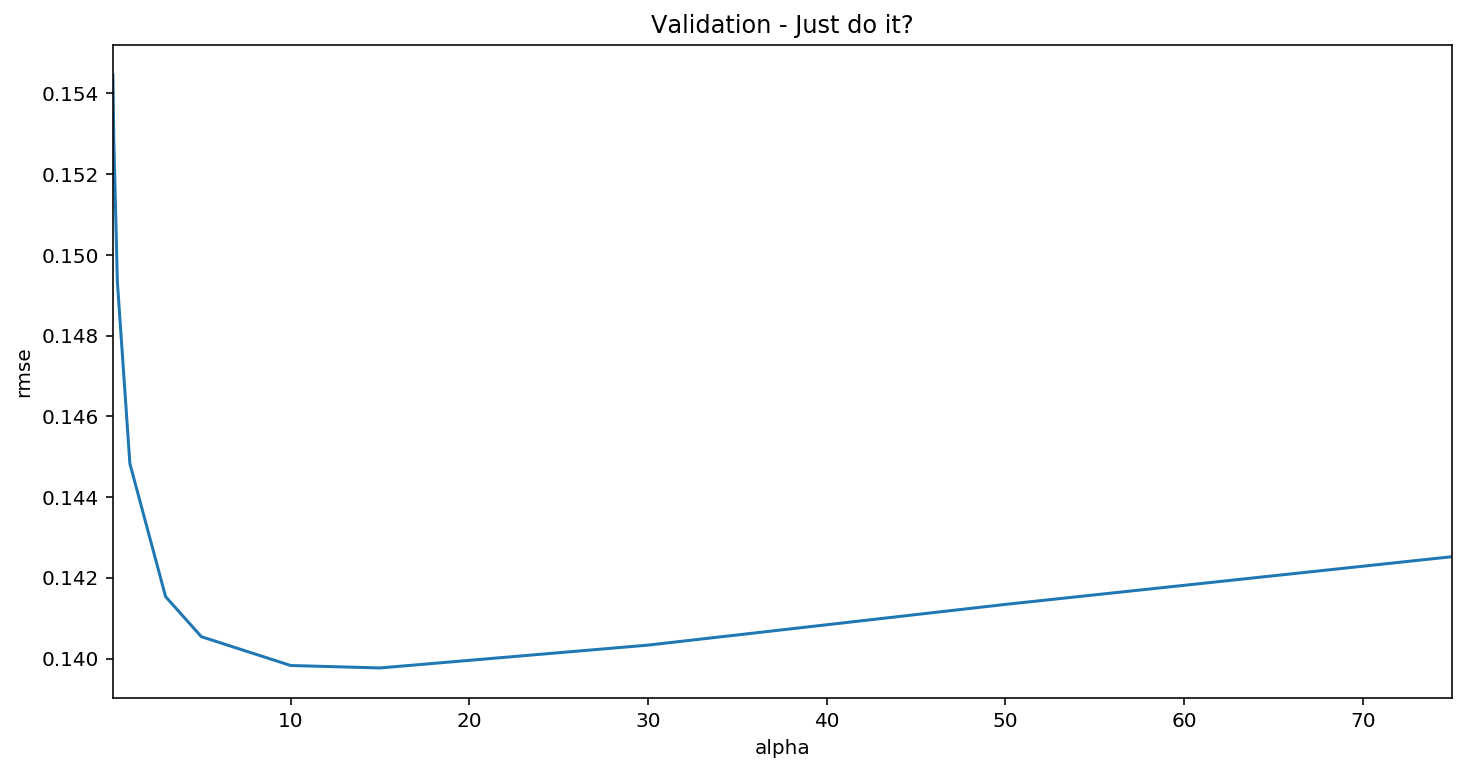

In [42]:
cv_ridge.plot(title="Validation - Just do it?")
plt.xlabel("alpha")
plt.ylabel("rmse")

여기에서 U-ish 모양인디 알파값이 너무 크면 정규화가 너무 들어갔고 모델이 데이터의 복잡도를 잡아내지 못한다. 하지만 너무 flexible하면 또 과적합이 될 수 있어서 10이 가장 적당한 값으로 파악됨!!!

In [43]:
cv_ridge.min()

0.13976596285220727

In [44]:
model_lasso = LassoCV(alphas= [ 1, 0.1, 0.001, 0.0005]).fit(X_train, y)

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [45]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [46]:
coef

MSSubClass              -0.000316
LotFrontage              0.000046
LotArea                  0.000002
OverallQual              0.056040
OverallCond              0.041180
YearBuilt                0.001762
YearRemodAdd             0.000858
MasVnrArea               0.000002
BsmtFinSF1               0.000066
BsmtFinSF2               0.000092
BsmtUnfSF                0.000035
TotalBsmtSF              0.000023
1stFlrSF                 0.000195
2ndFlrSF                 0.000203
LowQualFinSF             0.000173
GrLivArea                0.000025
BsmtFullBath             0.032842
BsmtHalfBath             0.000000
FullBath                 0.019394
HalfBath                 0.016211
BedroomAbvGr             0.002152
KitchenAbvGr            -0.021982
TotRmsAbvGrd             0.009532
Fireplaces               0.022886
GarageYrBlt             -0.000246
GarageCars               0.039478
GarageArea               0.000083
WoodDeckSF               0.000122
OpenPorchSF              0.000054
EnclosedPorch 

In [47]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 119 variables and eliminated the other 169 variables


여기에서 위에 설명했다시피 라소는 관계없는 것들은 다 제거 시켜주는 녀석이라고 169개의 변수를 제거한걸 볼수 있다. 그래서 288개중 119개의 더 중요한 coefficient를 볼수 있다함

In [48]:
X_train.columns.size

288

In [49]:
important_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

+에서 탑 10개 -에서 탑 10개 취해서 가장 중요한거 20개를 뽑는다.

In [50]:
help(matplotlib.rcParams)

Help on RcParams in module matplotlib object:

class RcParams(builtins.dict)
 |  A dictionary object including validation
 |  
 |  validating functions are defined and associated with rc parameters in
 |  :mod:`matplotlib.rcsetup`
 |  
 |  Method resolution order:
 |      RcParams
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __setitem__(self, key, val)
 |      Set self[key] to value.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  find_all(self, pattern)
 |      Return the subset of this RcParams dictionary whose keys match,
 |      using :func:`re.search`, the given ``pattern``.
 |      
 |      .. note::
 |      
 |          Changes to the returned dictionary are *not* propagated to
 |          the parent Rc

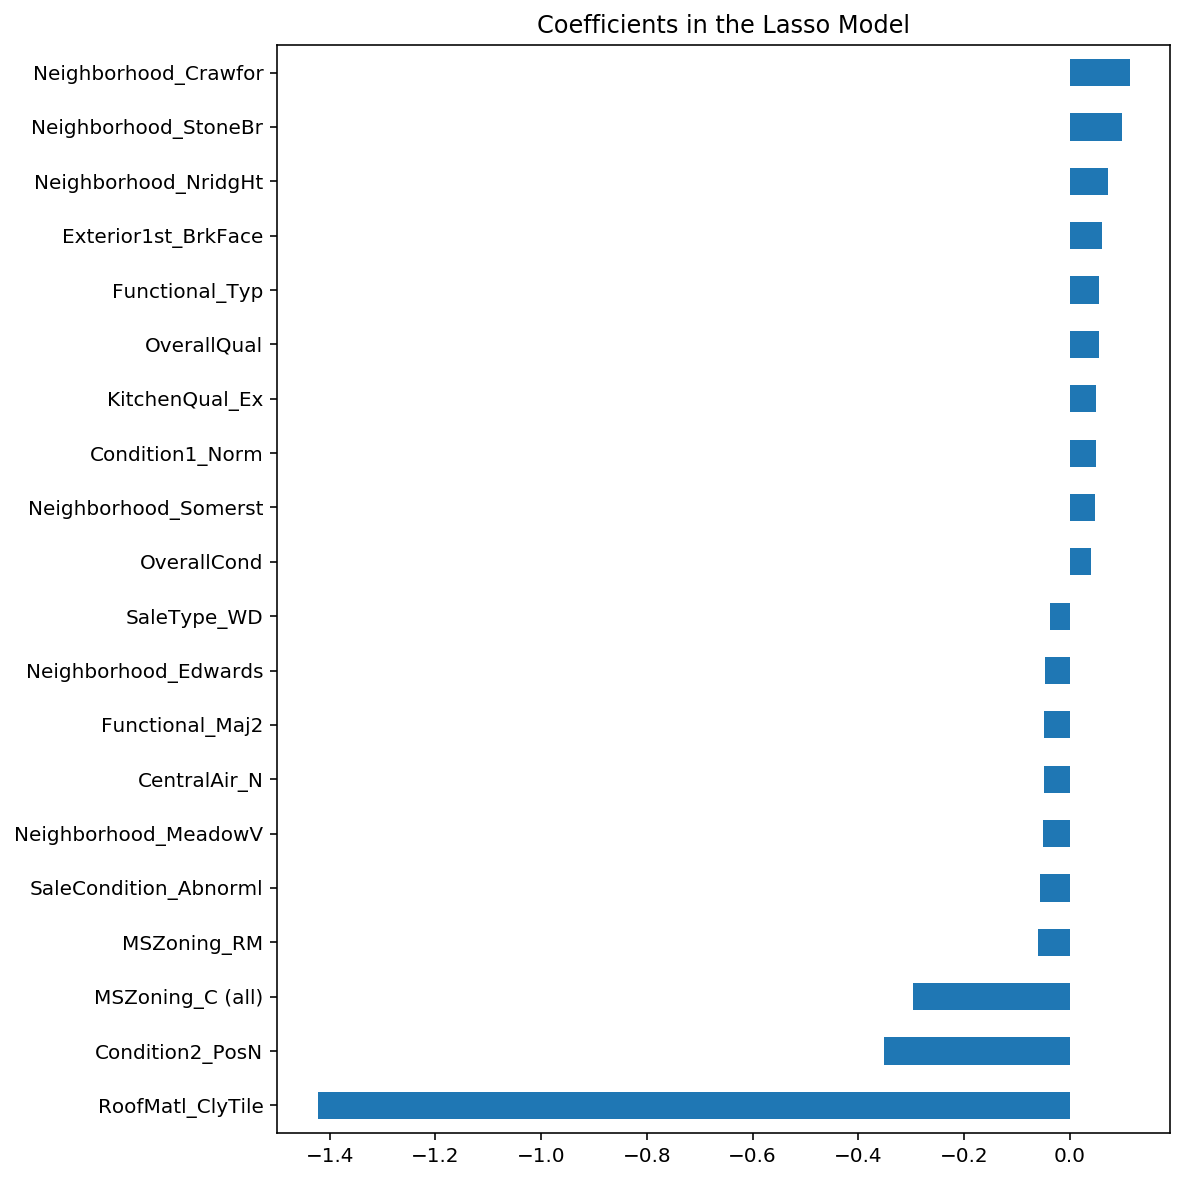

In [51]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind="barh") #bar histogram으로 plot찍자
plt.title("Coefficients in the Lasso Model")

이상하게 여기에서 원문을 보면 GrLivArea가 가장 높게 나와야 하는데 Neighborhood_Crawfor가 가장 높게 나왔다. 왜 그런지 모르겠다. ㅜㅜ  음수의 경우는 이해가 잘 안간다고 함. 더 살펴볼 필요가 있다고.. unbalanced catgorical variables 영향일지도 모른다고 함.  

여튼 이녀석의 장점은 랜덤포리스트보다는 확실히 feature의 중요성 파악이 용이하다고. Reasoning을 할수 있다. 단 유일한 이슈 하나는 log를 취해서 실제 규모와는 갭이 있을수 있다고!!

In [52]:
#let's look at the residuals as well
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame( {"preds": model_lasso.predict(X_train), "true" : y} )
preds["residuals"] = preds["true"] - preds["preds"]

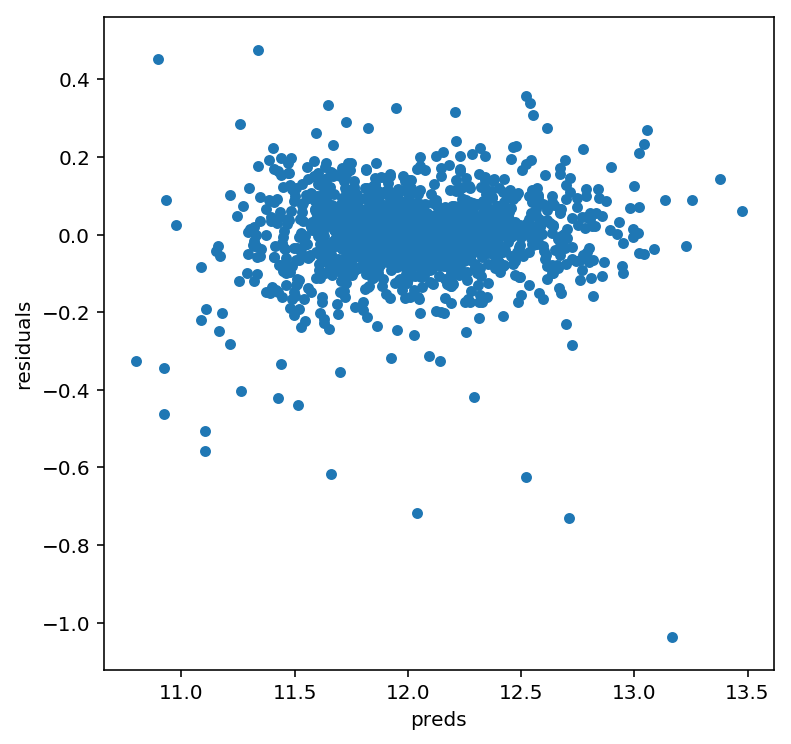

In [53]:
preds.plot(x = "preds", y = "residuals", kind="scatter")

Redisual Plot 이라고 하며 대부분의 plot이 바로 0에 많이 모여 있어서 베리 굿! 드디어 테스트 데이터를 기준으로 예측하고 leaderboard에 제출 해보자고!!

# Adding an xgboost model

linear model에 xgboost를 score를 향상시키기 위해 넣어보자고!

In [54]:
import xgboost as xgb

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# XGBoost
잠깐 이녀석을 짚고 넘어가보자. 
참고 글
1. [여기](http://freesearch.pe.kr/archives/4349)
2. [xgboost](https://brunch.co.kr/@snobberys/137) 
3. [xgboost 2](http://ishuca.tistory.com/388)
3. [xgboost github](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md)
4. [xgboost 저자의 슬라이드](https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)
Tree 기반의 Boosting을 GBDT라고 함 모델링 뿐만 아니라 feature selection에서도 팔방미인이라고 함


## Bagging vs Boosting

Bagging은 Traing data에서 랜덤 subset을 뽑아내(boostrap resampling) 모형을 만드는 과정을 N만큼 반복해 복수개의 모형을 만들고 이들의 voting을 예측하는 모형 RandomForest가 이에 해당하며 SVM과 같이 가장 좋은 분류 성능을 자랑한다고 함. 모형 에러중 학습셋 변동으로 생기는 모형의 에러를 variance error라고 하는데 Bagging이 이를 효과적으로 예방.

Boosting은 bias와 variance까지 최적화시켜주는 효과가 있다함. variance는 bagging처럼 boostrap resampling을 통해 낮추며 weak learner를 통해서 outlier와 anomaly dectetion문제를 잘 풀 수 있다고 한다. SVM의 margin을 최대화 하는 기법이 boosting과정에서도 수행된다고 하는 연구결과도 있다고 함. Boosting이 Bagging보다 낮다고..단 Boosting을 위해 엄청난 학습 시간과 파라메터 서치에 시간과 노력이 소요된다는 전제하에 말이다. 




## What is XGBoost?
### 시작
XGBoost는 Extreme Gradient Boosting의 약자라고 함. Greedy Function Approximation : A Gradient Boosting Machine(GBM)에서 제안되었다고함
[억사마]

## 정의
xgboost는 greedy algoritm을 사용하여 분류기를 찾아내고 분산처리(Parallel)로 적합한 비중 파라메터를 찾는 알고리즘이라고 한다. 분류기는 Regression Score을 사용하여 Accuracy Score를 측정하고 각 순서에 따라 Strong learner부터 Weak Learner를 랜덤하게 생성하며 이 분류기를 tree라고 하며 분류기를 조합한 최종 알고리즘을 Forest라고 한다고 함. 여기까지가 기본적인 boosting algorithm이다.

자 이제 xgboost를 살펴보자. CART(Classification And Regression Trees)의 집합이라고 볼수 있다. 즉 앙상블 모델을 사용한다. 이후 트리 부스팅을 사용하여 각 분류 기간 비중(weights)를 최적화하며 일반 decision tree와는 다르다. 리프 노드 하나에서만 decision value를 갖는게 아니라 CART는 모든 리프들이 모델의 최종 스코어와 관련되어 있다고 한다. 따라서 의사결정 트리가 분류를 제대로 했는지 초첨을 맞추는 반명 CART는 같은 모델끼리도 우위를 비교할 수 있다고 한다.   어렵다. 그냥 저위에 두번째 글 설명으로 대체할려다가 나중에 좀 더 파기 위해서 접근법을 다시 적는다.

In [55]:
from IPython.display import display, Math, Latex

In [56]:
%%latex
\[ \int\limits_0^1 x^2 + y^2 dx \]

<IPython.core.display.Latex object>

In [57]:
%%latex
\[ sum_{i=1}^{\infty}\]

<IPython.core.display.Latex object>

In [58]:
%%latex 
\nu

<IPython.core.display.Latex object>


우선 [수식1]에서 residual form을 테일러급수를 사용해서 일반화하기 좋은 형태로 바꿔보는것부터 시작. 물론 엔지니어링 관점에서는 구조적이라 컴퓨터가 계산하기 좋게 뽀갤수 있다함.



## 테일러급수
[무한급수](https://ghebook.blogspot.com/2010/10/infinite-series.html)를 보고 [테일러급수](https://ghebook.blogspot.com/2010/07/taylor-series.html)보자.



In [59]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

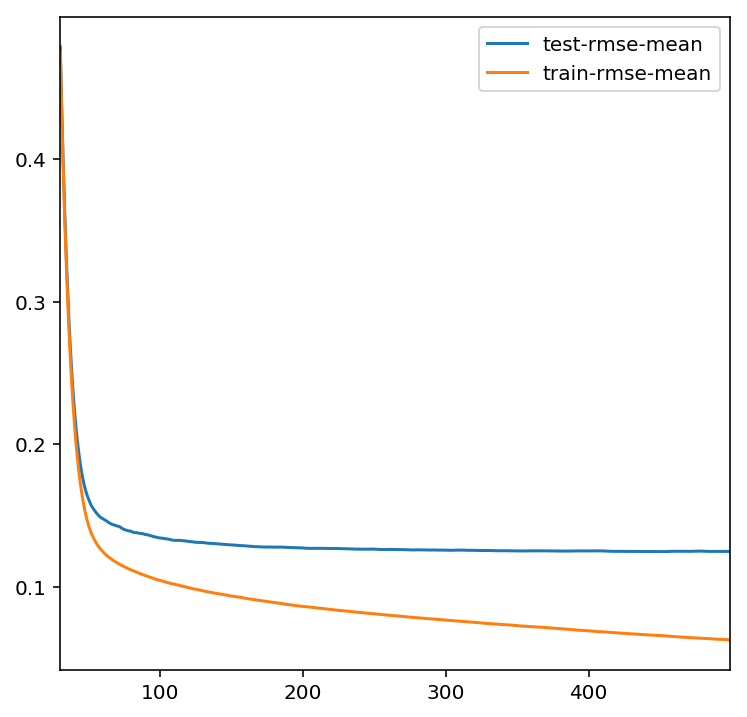

In [60]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [61]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [62]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

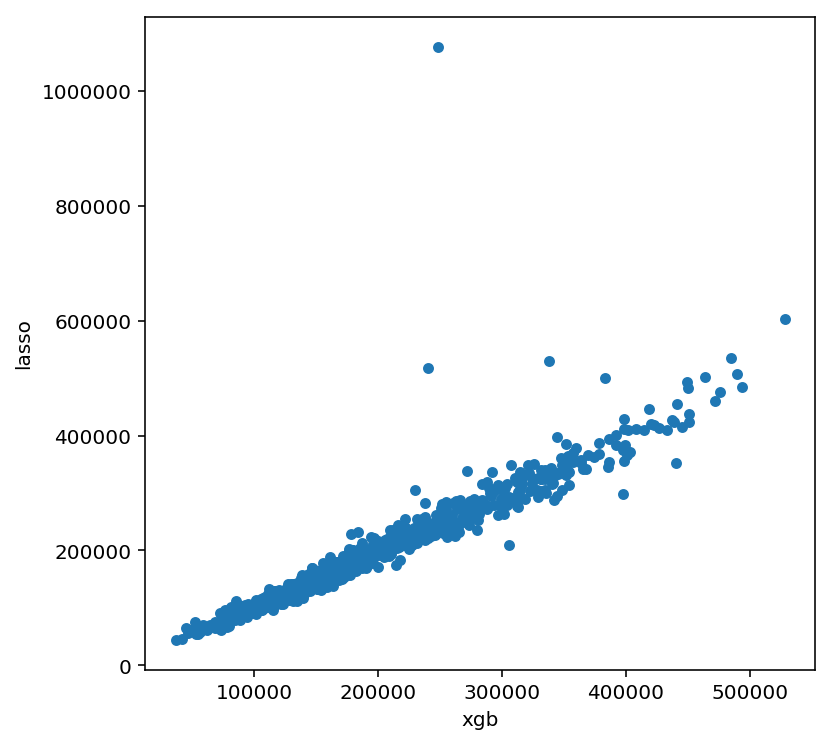

In [63]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [64]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [65]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

# 이번에는 Keras로 돌려보자

근데 이 분은 전혀 잘 안돌아간는데 해볼 필요가 있을랑가. 

In [66]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
X_train = StandardScaler().fit_transform(X_train)

In [68]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [70]:
X_tr.shape

(1095, 288)

In [71]:
X_tr

array([[ 0.78282825,  0.54872749, -0.33883346, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.45789401, -0.13197518, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.02780188, -0.43534727, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ..., 
       [-0.16310947, -0.90460813, -0.46020234, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [ 0.66458604, -0.45044075, -0.33241925, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.54634382,  2.45623048,  0.09973815, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [72]:
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., input_dim=288)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [74]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val))

Train on 1095 samples, validate on 365 samples
Epoch 1/10
1095/1095 [==============================] - 0s - loss: 147.1189 - val_loss: 149.8015
Epoch 2/10
1095/1095 [==============================] - 0s - loss: 144.7071 - val_loss: 150.4158
Epoch 3/10
1095/1095 [==============================] - 0s - loss: 142.9511 - val_loss: 151.2384
Epoch 4/10
1095/1095 [==============================] - 0s - loss: 141.3831 - val_loss: 152.2537
Epoch 5/10
1095/1095 [==============================] - 0s - loss: 139.9521 - val_loss: 153.5135
Epoch 6/10
1095/1095 [==============================] - 0s - loss: 138.5445 - val_loss: 154.7959
Epoch 7/10
1095/1095 [==============================] - 0s - loss: 137.2521 - val_loss: 156.1600
Epoch 8/10
1095/1095 [==============================] - 0s - loss: 135.9731 - val_loss: 157.6089
Epoch 9/10
1095/1095 [==============================] - 0s - loss: 134.6984 - val_loss: 159.1768
Epoch 10/10
1095/1095 [==============================] - 0s - loss: 133.3992 - v

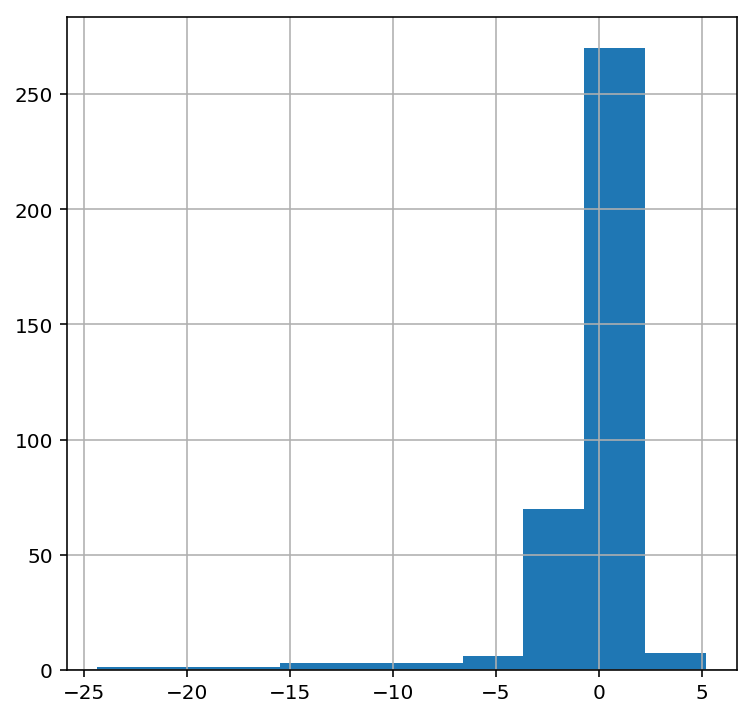

In [75]:
pd.Series(model.predict(X_val)[:,0]).hist()